In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")

<AxesSubplot:xlabel='sex', ylabel='count'>

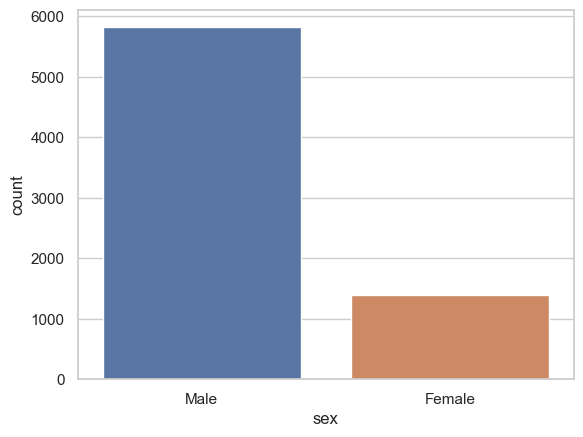

In [39]:
sns.countplot(x=df["sex"])

In [7]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [19]:
print(type(df["c_jail_in"][0]))

<class 'str'>


<AxesSubplot:xlabel='Age Category', ylabel='count'>

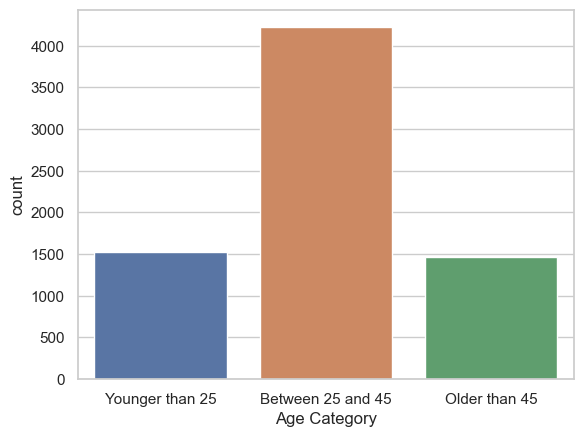

In [44]:
age_categories = []

for age in df["age"]:
    if age > 45:
        age_categories.append("Older than 45")
    elif age >= 25:
        age_categories.append("Between 25 and 45")
    else:
        age_categories.append("Younger than 25")

# Create a DataFrame with age categories
data = {'Age Category': age_categories}
ageData = pd.DataFrame(data)

# Set the style (optional)
sns.set(style="whitegrid")

# Create the countplot
sns.countplot(data=ageData, x='Age Category', order=['Younger than 25', 'Between 25 and 45', 'Older than 45'])


<AxesSubplot:xlabel='age', ylabel='Count'>

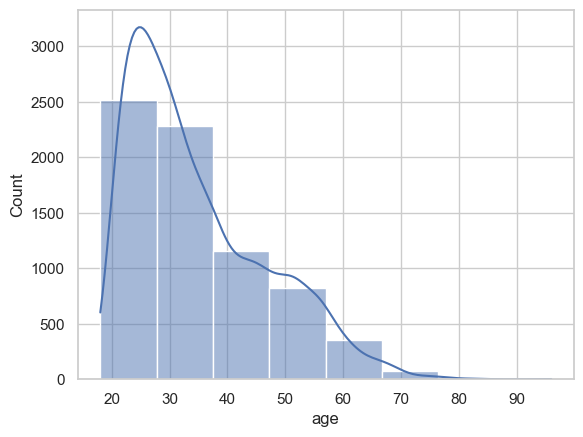

In [49]:
sns.histplot(data=df, x="age", bins=8, kde=True)

In [29]:
df["c_jail_in"] = pd.to_datetime(df["c_jail_in"])
df["c_jail_out"] = pd.to_datetime(df["c_jail_out"])
df["days_in_jail"] = (df["c_jail_out"] - df["c_jail_in"]).dt.days 


<AxesSubplot:title={'center':'Days in Jail After First Charge'}, xlabel='Days in Jail', ylabel='age'>

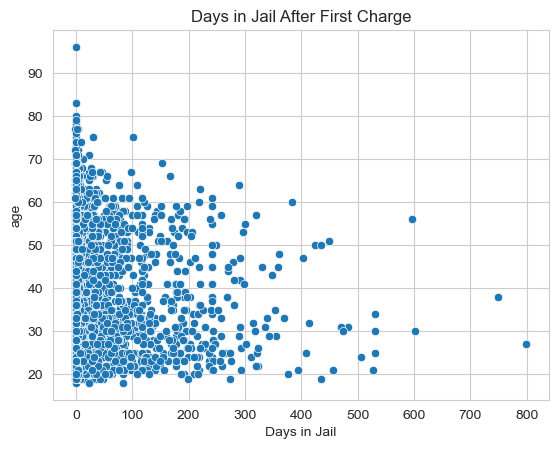

In [30]:
sns.set_style("whitegrid")
ax = plt.gca()
ax.set_xlabel("Days in Jail")
ax.set_title("Days in Jail After First Charge")
sns.scatterplot(data=df, x="days_in_jail", y="age")

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64


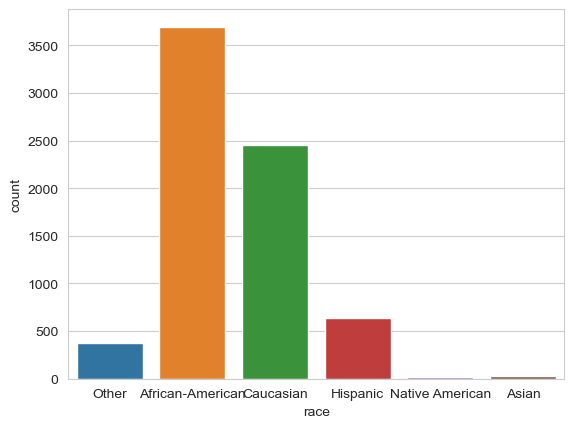

In [45]:
sns.countplot(data=df, x="race")
print(df["race"].value_counts())

1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64


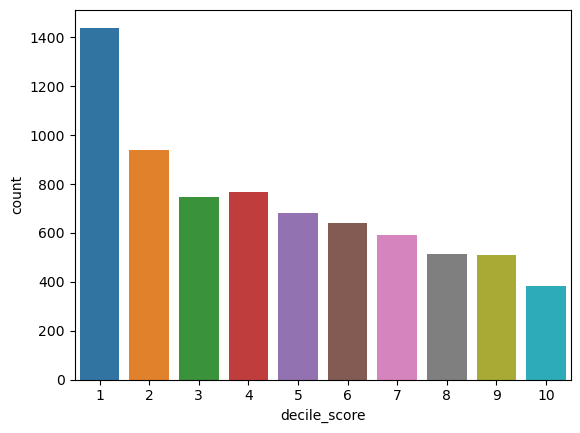

In [12]:
sns.countplot(data=df, x="decile_score")
print(df["decile_score"].value_counts())

<AxesSubplot:xlabel='decile_score', ylabel='sex'>

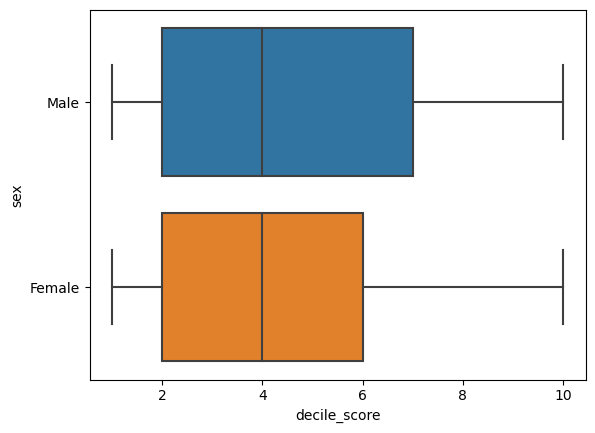

In [11]:
sns.boxplot(data=df, x="decile_score", y="sex")


<AxesSubplot:xlabel='decile_score', ylabel='race'>

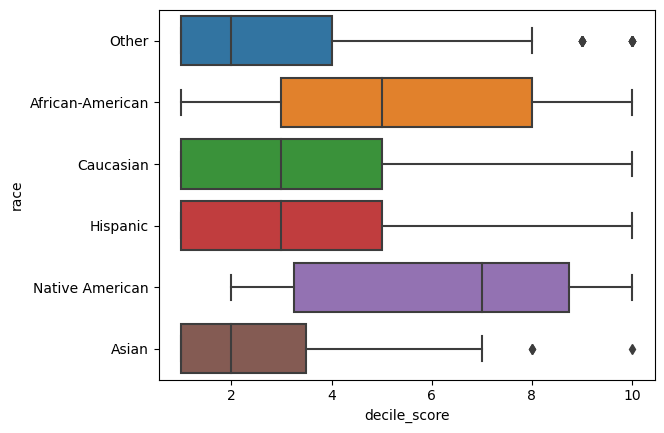

In [23]:
sns.boxplot(data=df, x="decile_score", y="race")

<AxesSubplot:xlabel='decile_score', ylabel='days_in_jail'>

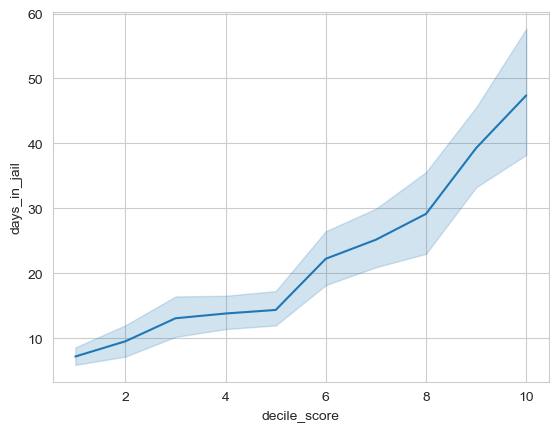

In [37]:
sns.lineplot(data=df, x="decile_score", y="days_in_jail")

<AxesSubplot:xlabel='decile_score', ylabel='two_year_recid'>

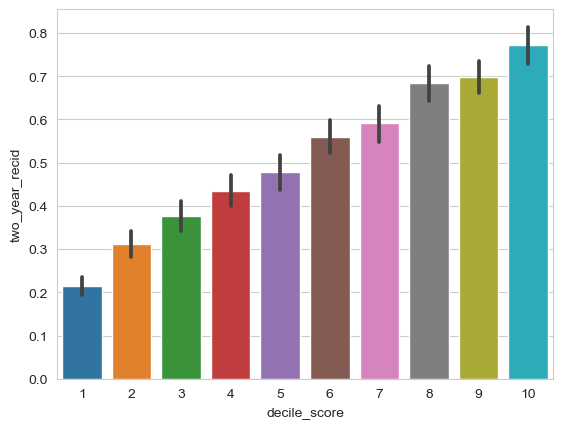

In [40]:
sns.barplot(data=df, x="decile_score", y="two_year_recid")